In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
# Charger le jeu de données Iris
iris = load_iris()


In [3]:
iris.target_names


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:

df_iris= pd.DataFrame(data=iris.data, columns=iris.feature_names) 

In [6]:
df_iris['target'] = iris.target

In [7]:

df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [8]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
df_iris.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [10]:
df_iris['espece']= df_iris.target.map({0:'setosa', 1:'versicolor',2:'virginica'})

In [11]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,espece
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [12]:
df_iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
espece               0
dtype: int64


###Visualisation avant

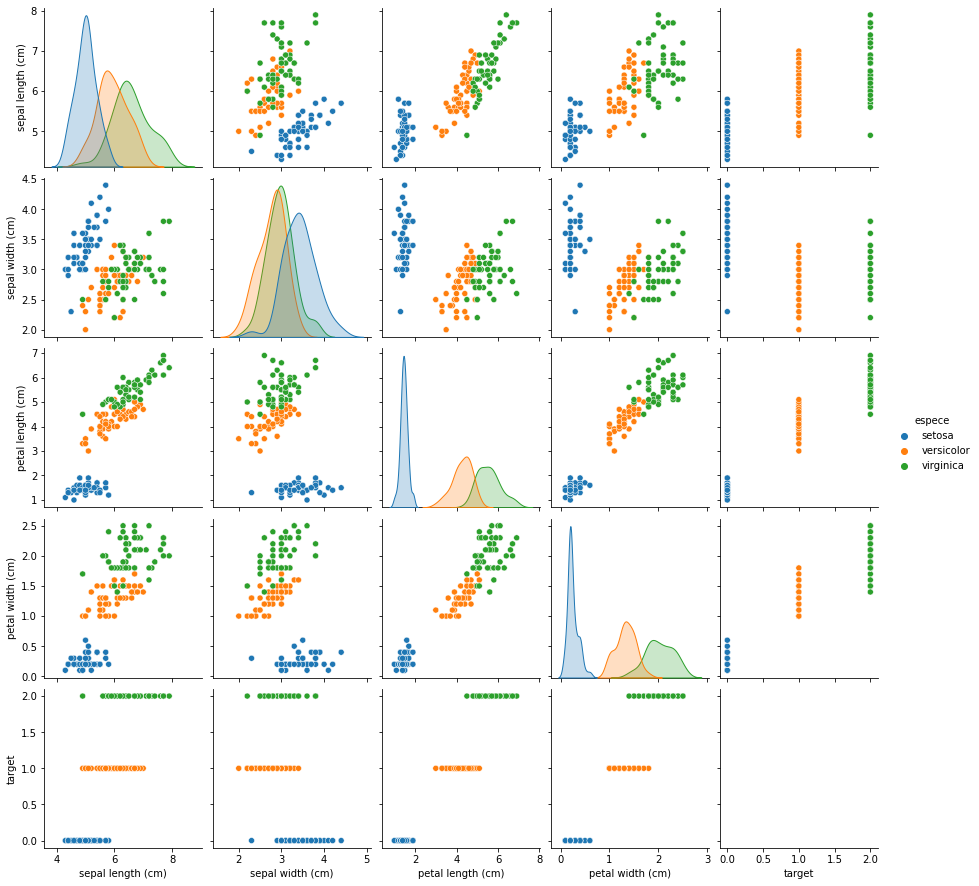

In [13]:
sns.pairplot(data=df_iris, hue='espece')
plt.show()

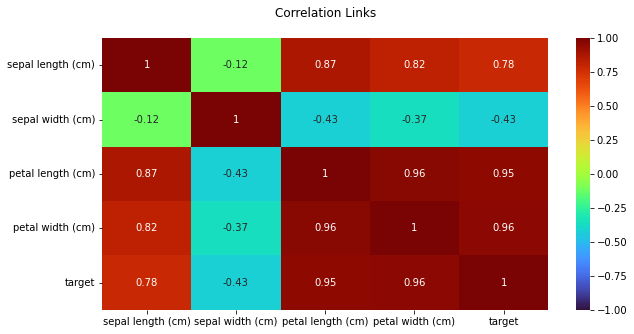

In [14]:
plt.figure(figsize=(10, 5))
plt.title('Correlation Links\n')
sns.heatmap(df_iris.corr(),
            vmin=-1,
            vmax=1,
            cmap='turbo',
            cbar=True,
            annot=True)
plt.show()


**Modelisation**

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [16]:
X = df_iris.drop(columns=['target', 'espece'])
y = df_iris['target']

In [17]:
# Diviser le jeu de données en un ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Initialiser la régression logistique
log_reg = LogisticRegression(max_iter=1000)  

 # Adapter le modèle à l'ensemble d'entraînement
log_reg.fit(X_train, y_train)



LogisticRegression(max_iter=1000)

In [18]:
# Prédire sur l'ensemble de test
y_pred = log_reg.predict(X_test)



In [19]:
accuracy_score(y_test, y_pred)

1.0

In [20]:
# tree_model = DecisionTreeClassifier(criterion='gini', max_depth =4)
# tree_model.fit(X_train, y_train)

In [21]:
# y_pred = tree_model.predict(X_test)

In [22]:
accuracy_score(y_test, y_pred)

1.0

In [25]:
from joblib import dump

# Sauvegarde du modèle avec joblib
dump(log_reg, 'iris_log_reg.pkl')


# Load the saved model from the file
# loaded_model = joblib.load('iris_log_reg.pkl')


['iris_log_reg.pkl']

In [ ]:
from sklearn.svm import SVC
